In [1]:
# to compute distances based on coordinates
from math import atan2, cos, radians, sin, sqrt

def great_circle_distance(point1: tuple[float, float], point2: tuple[float, float]) -> float:
    """
    Uses the haversine formula to compute the distance (m) between two
    points (latitude, longitude) in coordinates (in degrees).
    Adapted from http://www.movable-type.co.uk/scripts/latlong.html.
    :param point1: tuple whose first item represents the latitude, and
        its second item the longitude of a point in degrees
    :param point2: tuple whose first item represents the latitude, and
        its second item the longitude of a point in degrees
    :return: great-circle distance between the two points in meters
    """
    r = 6371e3  # radius of the earth, in meters

    latitude1_deg, longitude1_deg = point1  # in degrees
    latitude2_deg, longitude2_deg = point2  # in degrees

    latitude1_rad = radians(latitude1_deg)  # in radians
    latitude2_rad = radians(latitude2_deg)  # in radians

    latitude_delta = radians(latitude2_deg - latitude1_deg)
    longitude_delta = radians(longitude2_deg - longitude1_deg)

    a = sin(latitude_delta / 2) ** 2 + cos(latitude1_rad) * cos(latitude2_rad) * sin(longitude_delta / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return r * c


Some of the code provided in this notebook requires the geopandas library. Unfortunately, it
doesn’t work well with the default environment in Anaconda. To get it running, follow the following
steps:
<ol>
    <li>Make sure jupyter notebook and Anaconda are not running.</li>
    <li>Open Anaconda Navigator.</li>
    <li>Go to Environments (on the left).</li>
    <li>Click on “Import” (button near the bottom).</li>
    <li>Click on the folder icon next to “Local drive”.</li>
    <li>Select “Conda explicit specification files (*.txt)” in the drop-down in the bottom right-hand corner.</li>
    <li>Navigate to the folder where you extracted the files from the GA2 zip archive.</li>
    <li>Select geopandas-spec.txt and click “Open”.</li>
    <li>Click “Import”. Now Anaconda will create a new environment with the required packages. This may take some time.</li>
    <li>Go back to Home (on the left).</li>
    <li>You can now run jupyter notebook from here as normally. On restarts, make sure your new environment (“geopandas-spec”) selected at the top.</li>
</ol>
If you run into any issues with this, please ask your tutor for help.

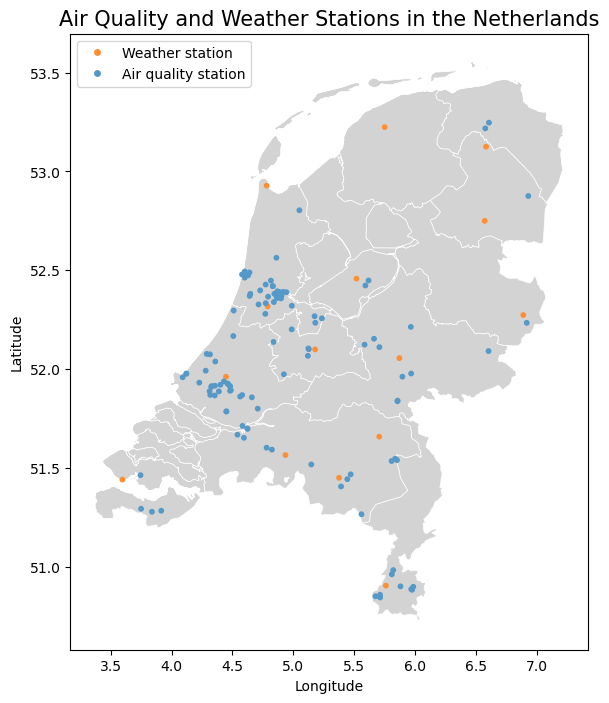

In [2]:
#Weather and Air Quality Map of NL
from matplotlib.lines import Line2D
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3

def plot_stations_on_map(df_stations):
    map_nl = gpd.read_file('./datasets/stanford-st293bj4601-shapefile.zip')

    gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(df_stations['longitude'], df_stations['latitude'])])
    gdf['color'] = list(df_stations['color'])
    gdf.crs = map_nl.crs

    f, ax = plt.subplots(1, figsize=(8, 8))

    map_nl.plot(linewidth=0.5, edgecolor='white', color='lightgrey',legend=True, ax=ax)
    gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=10)

    ax.set_title('Air Quality and Weather Stations in the Netherlands', size=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    legend = [
        Line2D([0], [0], markerfacecolor='#FF8F35', marker='o', color='w', label='Weather station'),
        Line2D([0], [0], markerfacecolor='#5499C7', marker='o', color='w', label='Air quality station')
    ]
    ax.legend(handles=legend, loc='upper left')
    return ax
    
def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with sqlite3.connect('./datasets/aqw.db') as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    return pd.concat([df_ws, df_aqs])

plot_stations_on_map(all_stations());